In [2]:
trainFilePath = "./final_train.csv"
testFilePath = "./final_test.csv"

### Data PreProcessing

In [3]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
import re

# Download NLTK resources
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/nihalsrinivasu/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/nihalsrinivasu/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [4]:
train = pd.read_csv(trainFilePath, on_bad_lines = 'skip')
train.head()

,text,label
0,We should keep the Electoral College for a num...,0
1,More and more money is spent on building theat...,1
2,Limiting car usage can actually be effective b...,0
3,"Dear Mrs. Smith,\n\nI am writing to you today ...",1
4,"Dear Principal,\n\nAfter school or during scho...",0


In [5]:
test = pd.read_csv(testFilePath, on_bad_lines = 'skip')
test.head()

,text,label
0,The Face on Mars is nothing but a natural occu...,0
1,Students have a higher chance of catching a vi...,0
2,Driverless cars have good and bad things that ...,0
3,Some people might think that traveling in a gr...,1
4,How many of us students want to be forced to d...,0


label
0    222154
1    124823
Name: text, dtype: int64


([<matplotlib.patches.Wedge at 0x33acea350>,
 [Text(-0.4691565746241433, 0.99493321810408, '0'),
  Text(0.46915657462414356, -0.9949332181040799, '1')],
 [Text(-0.2559035861586236, 0.542690846238589, '64%'),
  Text(0.25590358615862374, -0.542690846238589, '36%')])

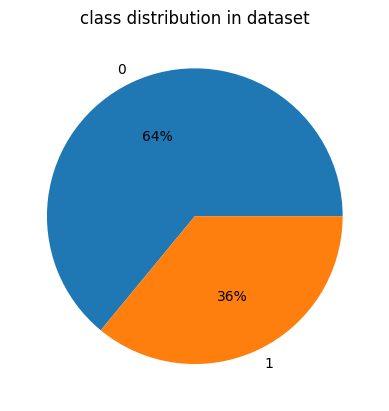

In [6]:
import matplotlib.pyplot as plt

data_classes = train.groupby('label').count()['text']
print(data_classes)
plt.title('class distribution in dataset')
plt.pie(data_classes , labels = ['0','1'] ,autopct='%0.0f%%')

### Random Undersampling

We need this to get a balanced distribution of classes.

In [7]:
X_0 = train[train['label'] == 0]
X_0

,text,label
0,We should keep the Electoral College for a num...,0
2,Limiting car usage can actually be effective b...,0
4,"Dear Principal,\n\nAfter school or during scho...",0
5,"Many people think that aliens are real, but th...",0
8,I think if a student has a C average he or she...,0
...,...,...
346971,Tie Face on Mars is really just a big misunder...,0
346972,The whole purpose of democracy is to create a ...,0
346974,I DFN't agree with this decision because a LFT...,0
346975,"Richard Non, Jimmy Carter, and Bob Dole and ot...",0


In [8]:
X_1 = train[train['label'] == 1]
X_1

,text,label
1,More and more money is spent on building theat...,1
3,"Dear Mrs. Smith,\n\nI am writing to you today ...",1
6,Our parents used to tell us not to stick to on...,1
7,"When it comes to technology, some people would...",1
13,The Benefits of Limiting Car Usage\n\nIn recen...,1
...,...,...
346949,I agree that online or video Conferencing dis...,1
346952,The Benefits of Limiting Car Usage \n\nMany ci...,1
346958,"As an eighth grade student, I believe that att...",1
346963,It is a common belief that having a broad know...,1


label
0    124823
1    124823
Name: text, dtype: int64


([<matplotlib.patches.Wedge at 0x33b26c5d0>,
 [Text(6.735557395310444e-17, 1.1, '0'),
  Text(-2.0206672185931328e-16, -1.1, '1')],
 [Text(3.6739403974420595e-17, 0.6, '50%'),
  Text(-1.1021821192326178e-16, -0.6, '50%')])

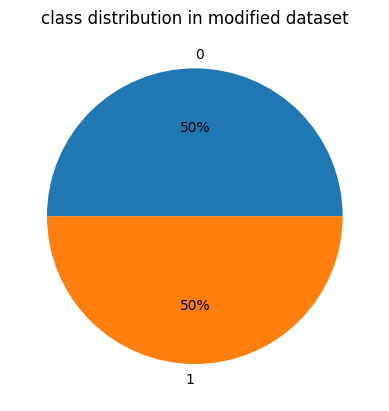

In [9]:
import random

X = list()
y = list()

total_0 = len(X_0)
total_1 = len(X_1)
visited = [False for i in range(total_0)]
while len(X) != data_classes[1]:
    random_index = random.randint(0, data_classes[0] - 1)
    if not visited[random_index]:
        visited[random_index] = True
        X.append(X_0.iloc[random_index]['text'])
        y.append(X_0.iloc[random_index]['label'])

for i in range(len(X_1)):
    X.append(X_1.iloc[i]['text'])
    y.append(X_1.iloc[i]['label'])

newTrain = pd.DataFrame()
newTrain['text'] = X
newTrain['label'] = y

import matplotlib.pyplot as plt

data_classes = newTrain.groupby('label').count()['text']
print(data_classes)
plt.title('class distribution in modified dataset')
plt.pie(data_classes , labels = ['0','1'] ,autopct='%0.0f%%')

label
0    55845
1    30742
Name: text, dtype: int64


([<matplotlib.patches.Wedge at 0x33b22ab90>,
 [Text(-0.48380354119796337, 0.9878937865602307, '0'),
  Text(0.48380354119796326, -0.9878937865602309, '1')],
 [Text(-0.26389284065343455, 0.5388511563055803, '64%'),
  Text(0.2638928406534345, -0.5388511563055804, '36%')])

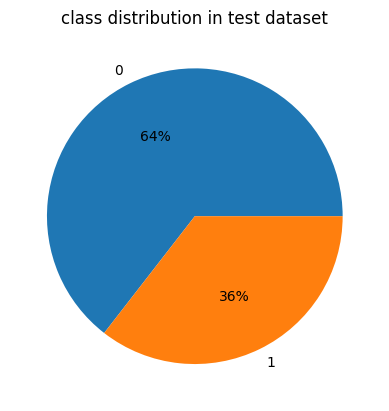

In [10]:
data_classes = test.groupby('label').count()['text']
print(data_classes)
plt.title('class distribution in test dataset')
plt.pie(data_classes , labels = ['0','1'] ,autopct='%0.0f%%')

In [11]:
# @title Text Preprocessing
# Define function for text preprocessing
def preprocess_text(sentence):
    # Lowercasing
    sentence = sentence.lower()
    # Tokenization
    tokens = word_tokenize(sentence)
    # Removing punctuation and special characters
    tokens = [re.sub(r'[^a-zA-Z0-9\s]', '', token) for token in tokens]
    # Removing stop words
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words]
    # Stemming
    stemmer = PorterStemmer()
    tokens = [stemmer.stem(token) for token in tokens]
    # Joining tokens back into sentence
    preprocessed_sentence = ' '.join(tokens)
    return preprocessed_sentence

# Apply preprocessing function to the 'text' column
newTrain['preprocessed_text'] = newTrain['text'].apply(preprocess_text)
test['preprocessed_text'] = test['text'].apply(preprocess_text)

In [12]:
newTrain.to_csv('./preprocessed_train.csv', index = False)
test.to_csv('./preprocessed_test.csv', index = False)

In [13]:
newTrain.to_csv("./preprocessed_train.csv", index = False)
test.to_csv('./preprocessed_test.csv', index = False)